In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from numpy import corrcoef
import operator
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif

In [2]:
df = pd.read_csv('kidney_disease.csv', index_col = 'id')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df = df.dropna()

In [4]:
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = LabelEncoder().fit_transform(df[col])

In [5]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11,42,14,1,0,0,1,1,1,0
9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,70.0,...,8,11,12,1,1,0,1,0,1,0
11,63.0,70.0,1.010,3.0,0.0,0,0,1,0,380.0,...,11,25,13,1,1,0,1,1,0,0
14,68.0,80.0,1.010,3.0,2.0,1,0,1,1,157.0,...,0,8,2,1,1,1,1,1,0,0
20,61.0,80.0,1.015,2.0,0.0,0,0,0,0,173.0,...,4,63,7,1,1,1,1,1,1,0


In [6]:
x = df.drop( ["classification"], axis = 1)
y = df["classification"]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [8]:
pearsoncorr = x_train.corr(method='pearson')
pearsoncorr

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
age,1.000000,0.094437,-0.204224,0.235009,0.157423,-0.104902,-0.148340,0.094095,0.078926,0.288626,...,-0.194187,-0.171537,-0.121241,-0.199038,0.352155,0.289481,0.244648,0.139676,0.213149,0.103378
bp,0.094437,1.000000,-0.187049,0.323892,0.273426,-0.319641,-0.135604,0.155350,0.194868,0.166764,...,-0.258317,-0.314912,0.042361,-0.205187,0.344323,0.182849,0.284778,0.053692,0.096240,0.304476
sg,-0.204224,-0.187049,1.000000,-0.728713,-0.412065,0.425498,0.606496,-0.503879,-0.577684,-0.523683,...,0.673935,0.690380,0.261859,0.596432,-0.639519,-0.534687,-0.351962,-0.529471,-0.600519,-0.447406
al,0.235009,0.323892,-0.728713,1.000000,0.515984,-0.456898,-0.749521,0.494822,0.530849,0.535150,...,-0.824295,-0.820774,-0.269631,-0.679829,0.855390,0.692944,0.374287,0.595030,0.629406,0.592354
su,0.157423,0.273426,-0.412065,0.515984,1.000000,-0.185939,-0.209001,0.151075,0.491458,0.711021,...,-0.398520,-0.408242,-0.088625,-0.367157,0.536088,0.575673,0.303109,0.210676,0.368684,0.191767
rbc,-0.104902,-0.319641,0.425498,-0.456898,-0.185939,1.000000,0.476608,-0.171053,-0.282784,-0.362971,...,0.473356,0.456608,0.091532,0.375620,-0.476910,-0.450973,-0.248153,-0.381656,-0.298169,-0.229416
pc,-0.148340,-0.135604,0.606496,-0.749521,-0.209001,0.476608,1.000000,-0.616591,-0.508918,-0.351255,...,0.738443,0.716095,0.185076,0.649264,-0.636959,-0.581872,-0.298240,-0.524157,-0.587599,-0.552060
pcc,0.094095,0.155350,-0.503879,0.494822,0.151075,-0.171053,-0.616591,1.000000,0.474347,0.266662,...,-0.505680,-0.505764,-0.290618,-0.482253,0.411877,0.302997,0.359030,0.381656,0.381656,0.487508
ba,0.078926,0.194868,-0.577684,0.530849,0.491458,-0.282784,-0.508918,0.474347,1.000000,0.424746,...,-0.452053,-0.440376,-0.162460,-0.378246,0.375717,0.404245,0.380682,0.233586,0.407226,0.159049
bgr,0.288626,0.166764,-0.523683,0.535150,0.711021,-0.362971,-0.351255,0.266662,0.424746,1.000000,...,-0.442218,-0.453226,-0.137314,-0.412918,0.585287,0.646468,0.347100,0.273481,0.386887,0.128398


<AxesSubplot:>

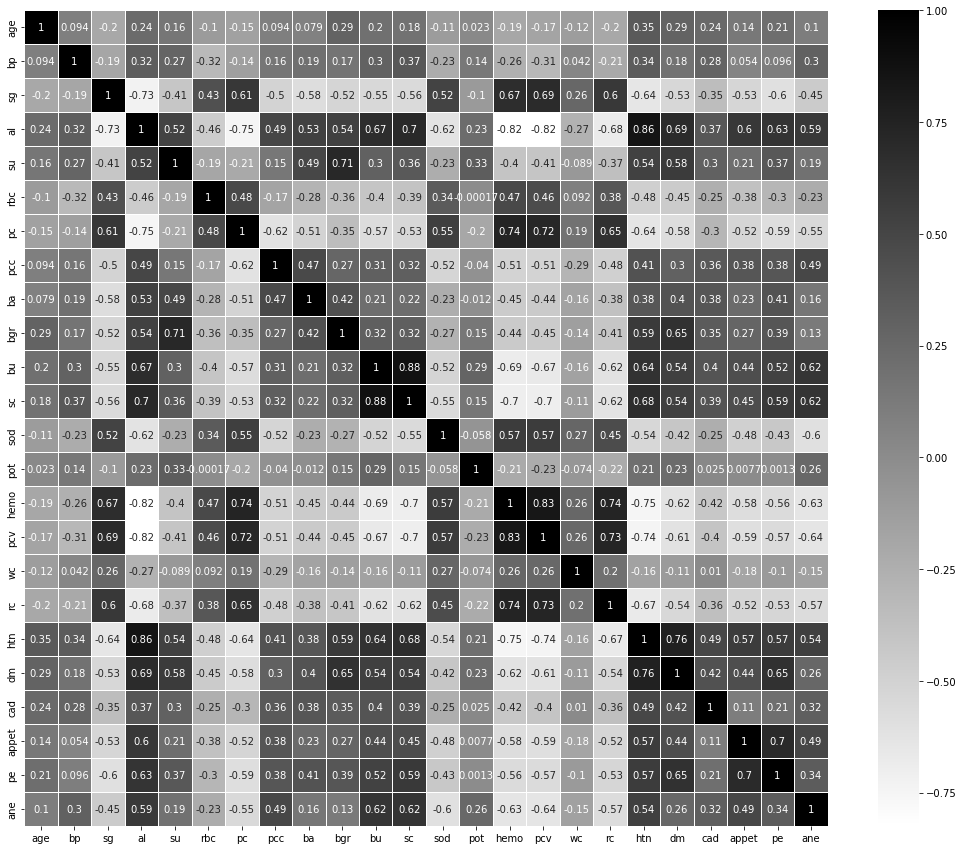

In [9]:
plt.figure(figsize = (18,15))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='binary',
            annot=True,
            linewidth=0.5)

In [10]:
#Selecting highly correlated features using Pearsons Correlation
def correlation(threshold):
    col_corr = set()
    corr_matrix = pearsoncorr
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > threshold):
            #if (corr_matrix.iloc[i, j] > threshold):
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [11]:
#select features with 75% threshold
corr_features = correlation(0.75)
corr_features

{'dm', 'htn', 'pcv', 'sc'}

In [12]:
#Correlation matrix and upper triangular matrix
cm = pearsoncorr.abs()
ut = cm.where(np.triu(np.ones(cm.shape),k=1).astype(bool))
todrop = {column for column in ut.columns if any(ut[column] > 0.75)}
todrop

{'dm', 'hemo', 'htn', 'pcv', 'sc'}

In [13]:
#MRMr implementation

class MRMR:
    def __init__(self, df, target_name, difference_or_quotient='difference'):
        self.df = df
        self.idxs_by_class = [df[df[target_name] == v].index for v in df[target_name].unique()]
        self.features = [col for col in df.columns if col != target_name]
        self.ranked_features = []
        self.feature_relevance = {feat_name: self.calc_feature_relevance(self.df[feat_name]) for feat_name in
                                  self.features}
        self.use_difference = difference_or_quotient == 'difference'
        self.calculated_correlations = {}

    def calc_feature_relevance(self, feature):
        groups = [feature[class_idxs].values for class_idxs in self.idxs_by_class]
        return f_oneway(*groups).statistic

    def calc_feature_redundancy(self, feature):
        redundancy = 0
        for feat in self.ranked_features:
            if (feat, feature) not in self.calculated_correlations:
                self.calculated_correlations[(feat, feature)] = abs(corrcoef(self.df[feature], self.df[feat])[1, 0])
                self.calculated_correlations[(feature, feat)] = abs(corrcoef(self.df[feature], self.df[feat])[1, 0])

            redundancy += self.calculated_correlations[(feat, feature)]
        return redundancy

    def rank_features(self):
        most_important_feature = max(self.feature_relevance.items(), key=operator.itemgetter(1))[0]
        self.ranked_features.append(most_important_feature)

        while len(self.ranked_features) != len(self.features):
            top_importance = 0
            most_important_feature = None
            for feat in self.features:
                if feat in self.ranked_features:
                    continue

                feature_redundancy = self.calc_feature_redundancy(feat)
                feature_relevance = self.feature_relevance[feat]
                if self.use_difference:
                    importance = feature_relevance - feature_redundancy
                else:
                    importance = feature_relevance / feature_redundancy

                if importance > top_importance:
                    top_importance = importance
                    most_important_feature = feat

            self.ranked_features.append(most_important_feature)

        return self.ranked_features

In [14]:
different_ranking_methods = {}

In [15]:
f_scores = f_classif(x, y)[0]
f_scores = pd.Series(f_scores, index=[col for col in df.columns if col!='classification']).sort_values(ascending=False)
different_ranking_methods['anova_f_statistic'] = f_scores.index

In [16]:
mrmr = MRMR(df, 'classification')
different_ranking_methods['mrmr_difference_based'] = mrmr.rank_features()

In [17]:
mrmr = MRMR(df, 'classification', difference_or_quotient='quotient')
different_ranking_methods['mrmr_quotient_based'] = mrmr.rank_features()

In [18]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
rfc_features = pd.Series(model.feature_importances_, index=mrmr.features).sort_values(ascending=False)
different_ranking_methods['random_forest_feature_ranking'] = rfc_features.index

In [19]:
pd.DataFrame(different_ranking_methods)

,anova_f_statistic,mrmr_difference_based,mrmr_quotient_based,random_forest_feature_ranking
0,al,al,al,al
1,htn,htn,htn,hemo
2,hemo,hemo,hemo,pcv
3,pcv,pcv,sg,sc
4,sg,sg,pcv,rc
5,pc,pc,pc,bu
6,dm,dm,dm,htn
7,rc,rc,rc,sg
8,sc,sc,sc,pc
9,bu,bu,bu,dm


In [23]:
from mrmr import mrmr_classif
selected_features = mrmr_classif(X=x, y=y, K=10)
print(selected_features)
print(corr_features)
print(todrop)

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 132.81it/s]

['al', 'htn', 'hemo', 'sg', 'pcv', 'pc', 'dm', 'rc', 'sc', 'bu']
{'sc', 'htn', 'pcv', 'dm'}
{'dm', 'sc', 'pcv', 'htn', 'hemo'}


In [26]:
selected_features = [i for i in selected_features if i not in corr_features.union(todrop)]
selected_features

['al', 'sg', 'pc', 'rc', 'bu']

In [ ]:
#https://github.com/smazzanti/mrmr
#https://elliot-weissberg.medium.com/another-feature-selection-algorithm-mrmr-3827b6b19e33